In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Загрузка исходного DataFrame
# data = pd.read_csv('../data/raw/input_data.csv', sep=';')

In [103]:
# data.shape

In [104]:
# Создание подвыборки
# sample_data = data.sample(frac=0.1, random_state=42)
# sample_data.to_csv('../data/processed/sampled_data.csv', index=False)

# print(f'Размер подвыборки {sample_data.shape}')

In [105]:
sample_data = pd.read_csv("../data/processed/sampled_data.csv")

Набор данных состоит из следующих полей:
- data - дата
- price - цена в рублях
- level - этаж квартиры
- levels - количество этажей в доме
- rooms - количество комнат
- area - площадь
- kitchen_area - площадь кухни
- geo_lat - долгота
- geo_lon - широта
- building_type - 0 - не знаю; 1 - другое; 2 - панельный; 3 - монолит; 4 - кирпич; 5 - блочный; 6 - деревянный
- object_type - 0 - вторичка; 1 - новостройка
- postal_code - почтовый индекс
- street_id - id улицы
- id_region - номер региона
- house_id - id дома

Удаляем все дубликаты из датасета

In [106]:
sample_data = sample_data.drop_duplicates()

In [107]:
sample_data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-08-17,5740535,8,17,1,42.9,9.5,55.591058,37.752858,0,2,142717.0,NaN,50,1100977.0
1,2021-06-12,4750000,12,16,2,49.0,18.0,57.191065,65.581201,0,0,625031.0,526777.0,72,2779946.0
2,2021-07-05,5695000,6,9,3,67.3,8.0,57.123336,65.557107,2,0,625007.0,190545.0,72,2260949.0
3,2021-03-10,2650000,5,9,2,44.0,0.0,56.848916,53.283994,5,0,426072.0,168301.0,18,1198196.0
4,2021-06-07,950000,1,5,1,33.0,6.0,56.856968,40.550985,2,0,155048.0,NaN,37,NaN


In [108]:
print(sample_data.info())
print(sample_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1129797 entries, 0 to 1135814
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date           1129797 non-null  object 
 1   price          1129797 non-null  int64  
 2   level          1129797 non-null  int64  
 3   levels         1129797 non-null  int64  
 4   rooms          1129797 non-null  int64  
 5   area           1129797 non-null  float64
 6   kitchen_area   1129797 non-null  float64
 7   geo_lat        1129797 non-null  float64
 8   geo_lon        1129797 non-null  float64
 9   building_type  1129797 non-null  int64  
 10  object_type    1129797 non-null  int64  
 11  postal_code    1079209 non-null  float64
 12  street_id      711253 non-null   float64
 13  id_region      1129797 non-null  int64  
 14  house_id       804905 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 137.9+ MB
None
              price         level        

In [109]:
sample_data.isna().sum()

date                  0
price                 0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area          0
geo_lat               0
geo_lon               0
building_type         0
object_type           0
postal_code       50588
street_id        418544
id_region             0
house_id         324892
dtype: int64

In [110]:
for col in sample_data.columns:
    print(col, sample_data[col].unique())

date ['2021-08-17' '2021-06-12' '2021-07-05' '2021-03-10' '2021-06-07'
 '2021-09-14' '2021-05-13' '2021-01-06' '2021-12-21' '2021-03-15'
 '2021-08-04' '2021-10-01' '2021-05-23' '2021-10-23' '2021-10-04'
 '2021-07-16' '2021-04-03' '2021-04-26' '2021-08-07' '2021-02-04'
 '2021-04-27' '2021-09-17' '2021-06-21' '2021-11-02' '2021-01-19'
 '2021-07-04' '2021-05-06' '2021-06-20' '2021-11-06' '2021-08-30'
 '2021-11-12' '2021-07-01' '2021-05-29' '2021-10-14' '2021-03-13'
 '2021-09-03' '2021-10-07' '2021-10-09' '2021-08-23' '2021-11-08'
 '2021-03-08' '2021-10-11' '2021-12-23' '2021-12-09' '2021-02-08'
 '2021-05-20' '2021-12-13' '2021-09-30' '2021-04-14' '2021-11-04'
 '2021-02-28' '2021-03-22' '2021-10-22' '2021-07-14' '2021-09-28'
 '2021-01-24' '2021-11-05' '2021-08-06' '2021-07-27' '2021-01-30'
 '2021-07-07' '2021-08-08' '2021-04-23' '2021-04-18' '2021-12-06'
 '2021-01-27' '2021-04-01' '2021-02-26' '2021-11-26' '2021-11-23'
 '2021-11-16' '2021-11-10' '2021-03-23' '2021-10-10' '2021-08-26'
 '202

## Очистка данных
1. Поменяем значения в котегориальных стобцах
2. Удалим ненужные столбцы
3. Меняем отрицательные значения в rooms на противоположное
4. Берем модуль от цены, т.к нет отрицательных значений и уберем выбросы
5. Поменяем местами этаж и количество этажей в доме, если этаж больше количества (возможно ошибка)
6. Оставим только год
7. Избавляемся от выбросов в остальных столбцах
8. Считаем среднюю площаль комнаты в квартире (mean_area_rooms) 

In [111]:
sample_data.head(2)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-08-17,5740535,8,17,1,42.9,9.5,55.591058,37.752858,0,2,142717.0,NaN,50,1100977.0
1,2021-06-12,4750000,12,16,2,49.0,18.0,57.191065,65.581201,0,0,625031.0,526777.0,72,2779946.0


##### 1. Преобразуем категориальные столбцы

In [112]:
object_name = {0: 0, 2: 1}

In [113]:
building_name = {'0': 'don`t know', '1': 'other', '2': 'panel', '3': 'monolithic', '4': 'brick', '5': 'blocky', '6': 'wooden'}

In [114]:
sample_data['object_type'] = sample_data['object_type'].map(object_name)
sample_data['building_type'] = sample_data['building_type'].astype('str').map(building_name)

In [115]:
regions = {
    1: "Republic of Adygea",
    2: "Republic of Bashkortostan",
    3: "Republic of Buryatia",
    4: "Altai Republic",
    5: "Republic of Dagestan",
    6: "Republic of Ingushetia",
    7: "Kabardino-Balkarian Republic",
    8: "Republic of Kalmykia",
    9: "Karachay-Cherkess Republic",
    10: "Republic of Karelia",
    11: "Komi Republic",
    12: "Mari El Republic",
    13: "Republic of Mordovia",
    14: "Republic of Sakha (Yakutia)",
    15: "Republic of North Ossetia-Alania",
    16: "Republic of Tatarstan",
    17: "Tuva Republic",
    18: "Udmurt Republic",
    19: "Republic of Khakassia",
    20: "Chechen Republic",
    21: "Chuvash Republic",
    22: "Altai Krai",
    23: "Krasnodar Krai",
    24: "Krasnoyarsk Krai",
    25: "Primorsky Krai",
    26: "Stavropol Krai",
    27: "Khabarovsk Krai",
    28: "Amur Oblast",
    29: "Arkhangelsk Oblast",
    30: "Astrakhan Oblast",
    31: "Belgorod Oblast",
    32: "Bryansk Oblast",
    33: "Vladimir Oblast",
    34: "Volgograd Oblast",
    35: "Vologda Oblast",
    36: "Voronezh Oblast",
    37: "Ivanovo Oblast",
    38: "Irkutsk Oblast",
    39: "Kaliningrad Oblast",
    40: "Kaluga Oblast",
    41: "Kamchatka Krai",
    42: "Kemerovo Oblast",
    43: "Kirov Oblast",
    44: "Kostroma Oblast",
    45: "Kurgan Oblast",
    46: "Kursk Oblast",
    47: "Leningrad Oblast",
    48: "Lipetsk Oblast",
    49: "Magadan Oblast",
    50: "Moscow Oblast",
    51: "Murmansk Oblast",
    52: "Nizhny Novgorod Oblast",
    53: "Novgorod Oblast",
    54: "Novosibirsk Oblast",
    55: "Omsk Oblast",
    56: "Orenburg Oblast",
    57: "Oryol Oblast",
    58: "Penza Oblast",
    59: "Perm Krai",
    60: "Pskov Oblast",
    61: "Rostov Oblast",
    62: "Ryazan Oblast",
    63: "Samara Oblast",
    64: "Saratov Oblast",
    65: "Sakhalin Oblast",
    66: "Sverdlovsk Oblast",
    67: "Smolensk Oblast",
    68: "Tambov Oblast",
    69: "Tver Oblast",
    70: "Tomsk Oblast",
    71: "Tula Oblast",
    72: "Tyumen Oblast",
    73: "Ulyanovsk Oblast",
    74: "Chelyabinsk Oblast",
    75: "Zabaykalsky Krai",
    76: "Yaroslavl Oblast",
    77: "Moscow",
    78: "Saint Petersburg",
    79: "Jewish Autonomous Oblast",
    83: "Nenets Autonomous Okrug",
    86: "Khanty-Mansi Autonomous Okrug – Yugra",
    87: "Chukotka Autonomous Okrug",
    89: "Yamalo-Nenets Autonomous Okrug",
    91: "Republic of Crimea (disputed)",
    92: "Sevastopol (disputed)"
}

In [116]:
sample_data['region'] = sample_data['id_region'].map(regions)

##### 2. Удалим ненужные столбцы

In [117]:
del_columns = ['date', 'street_id', 'postal_code', 'house_id', 'id_region']
sample_data = sample_data.drop(del_columns, axis=1)

In [118]:
sample_data['is_studio'] = (sample_data['rooms'] == -1).astype(int)
sample_data['rooms'] = sample_data['rooms'].replace(-1, 0)

In [119]:
# Расчитаем среднюю площадь на комнату
sample_data['mean_area_rooms'] = sample_data['area'] / sample_data['rooms'].replace(0, 1) # учитываем студии

# Устанавливаем порог минимальной площали на комнату
min_area_per_room = 5
sample_data = sample_data[sample_data['mean_area_rooms'] >= min_area_per_room]

# Проверка 
print(sample_data['mean_area_rooms'].describe())
print(sample_data['rooms'].value_counts())

count    1.129723e+06
mean     3.018852e+01
std      1.006819e+01
min      5.000000e+00
25%      2.300000e+01
50%      2.900000e+01
75%      3.560000e+01
max      4.944000e+02
Name: mean_area_rooms, dtype: float64
rooms
1    391407
2    383247
3    226440
0     83283
4     38185
5      5395
6      1556
7       130
8        51
9        29
Name: count, dtype: int64


In [120]:
sample_data.shape

(1129723, 13)

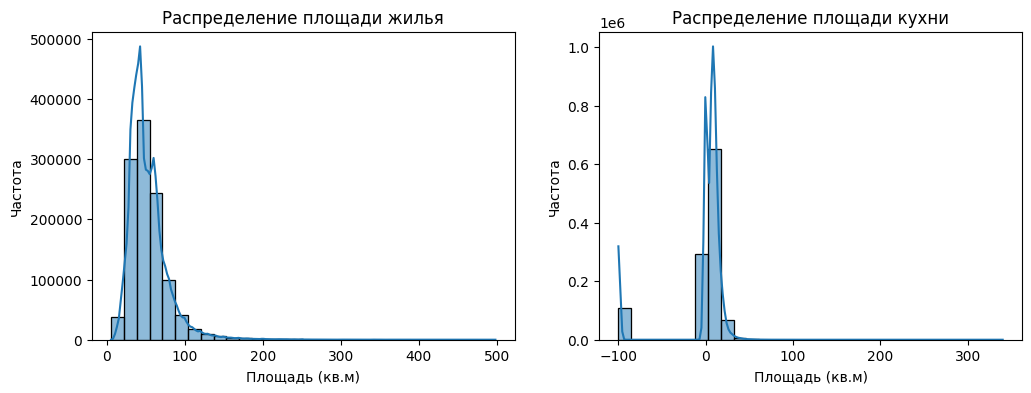

In [121]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(sample_data['area'], kde=True, bins=30)
plt.title('Распределение площади жилья')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(sample_data['kitchen_area'], kde=True, bins=30)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Частота')
plt.show()

In [122]:
min_area = 10
max_area = 150

min_kitchen_area = 4
max_kitchen_area = 40

sample_data = sample_data[sample_data['area'].between(min_area, max_area)] # допустимая площадь
sample_data = sample_data[sample_data['kitchen_area'].between(min_kitchen_area, max_kitchen_area)] # допустимая площадь кухни

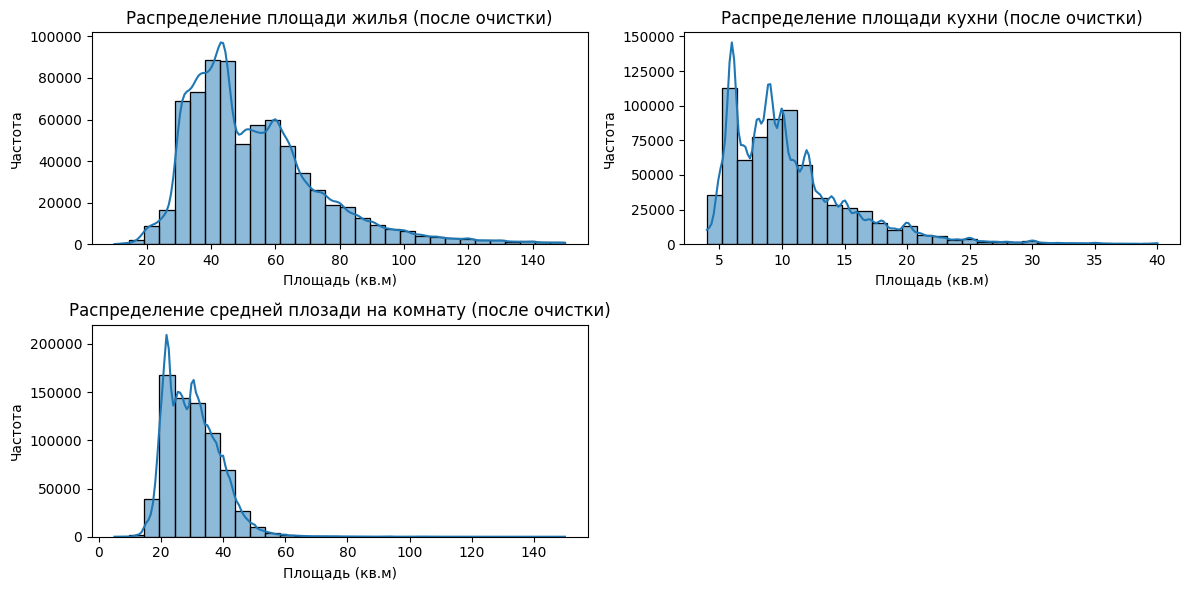

In [123]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(sample_data['area'], kde=True, bins=30)
plt.title('Распределение площади жилья (после очистки)')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
sns.histplot(sample_data['kitchen_area'], kde=True, bins=30)
plt.title('Распределение площади кухни (после очистки)')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Частота')

plt.subplot(2, 2, 3)
sns.histplot(sample_data['mean_area_rooms'], kde=True, bins=30)
plt.title('Распределение средней плозади на комнату (после очистки)')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [124]:
sample_data = sample_data[(sample_data['level'] > 0) & (sample_data['levels'] > 0)]
condition = sample_data['level'] > sample_data['levels']
sample_data.loc[condition, ['level', 'levels']] = sample_data.loc[condition, ['levels', 'level']].values

In [125]:
sample_data['price_per_m2'] = sample_data['price'] / sample_data['area']

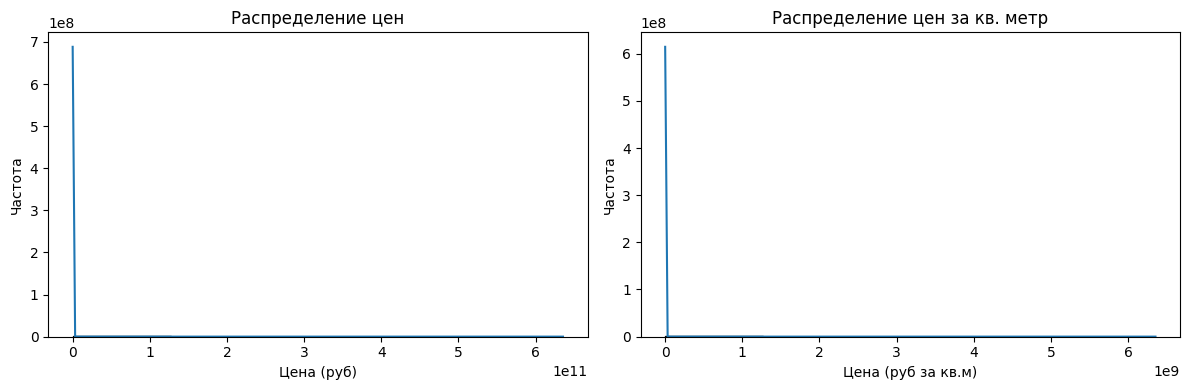

In [126]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(sample_data['price'], kde=True, bins=5)
plt.title('Распределение цен')
plt.xlabel('Цена (руб)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(sample_data['price_per_m2'], kde=True, bins=5)
plt.title('Распределение цен за кв. метр')
plt.xlabel('Цена (руб за кв.м)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [127]:
min_price = 800_000
max_price = 20_000_000

min_price_per_m2 = 10_000
max_price_per_m2 = 600_000

sample_data = sample_data[(sample_data['price'].between(min_price, max_price)) & 
    (sample_data['price_per_m2'].between(min_price_per_m2, max_price_per_m2))]

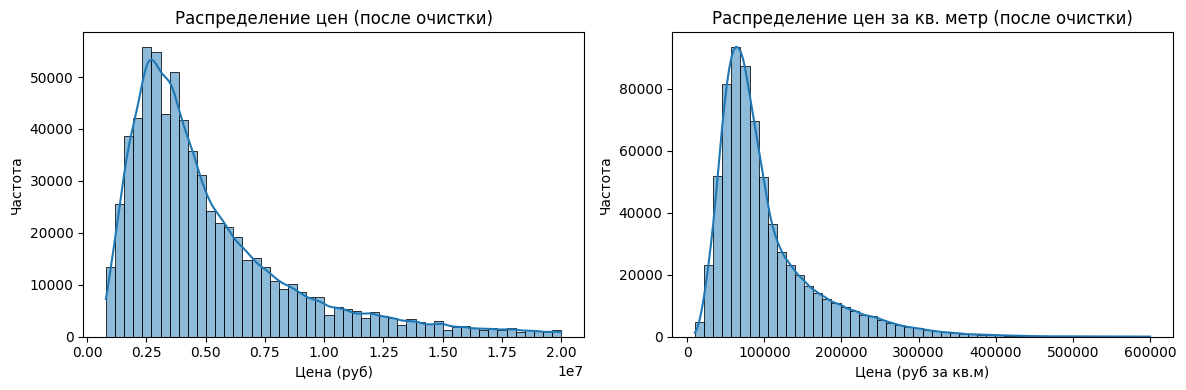

In [128]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(sample_data['price'], kde=True, bins=50)
plt.title('Распределение цен (после очистки)')
plt.xlabel('Цена (руб)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(sample_data['price_per_m2'], kde=True, bins=50)
plt.title('Распределение цен за кв. метр (после очистки)')
plt.xlabel('Цена (руб за кв.м)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

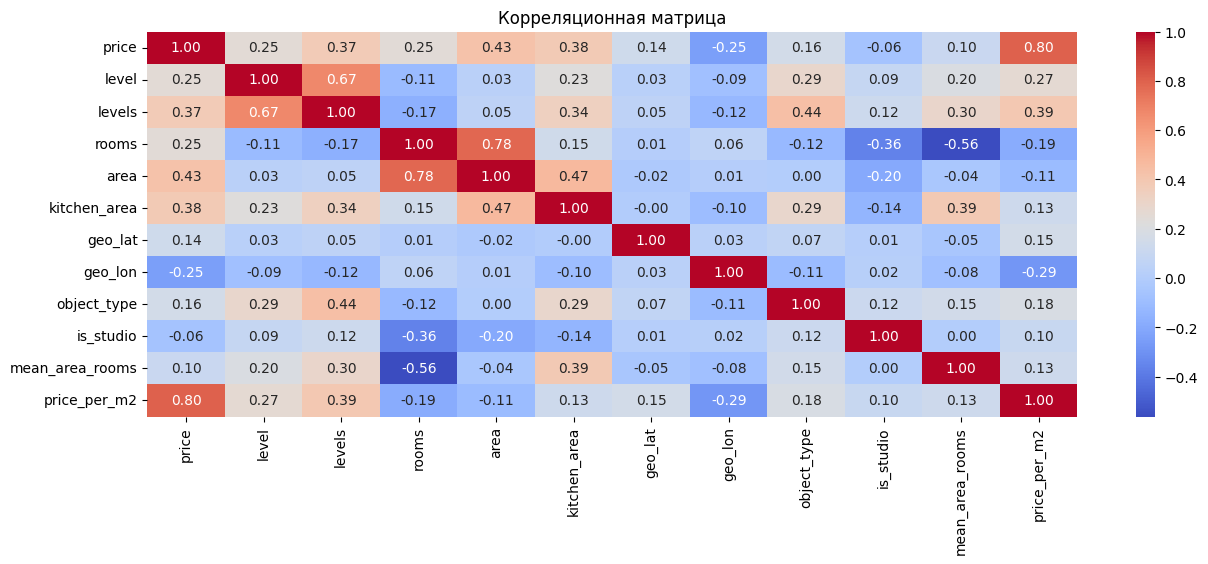

In [129]:
plt.figure(figsize=(15, 5))
sns.heatmap(sample_data.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

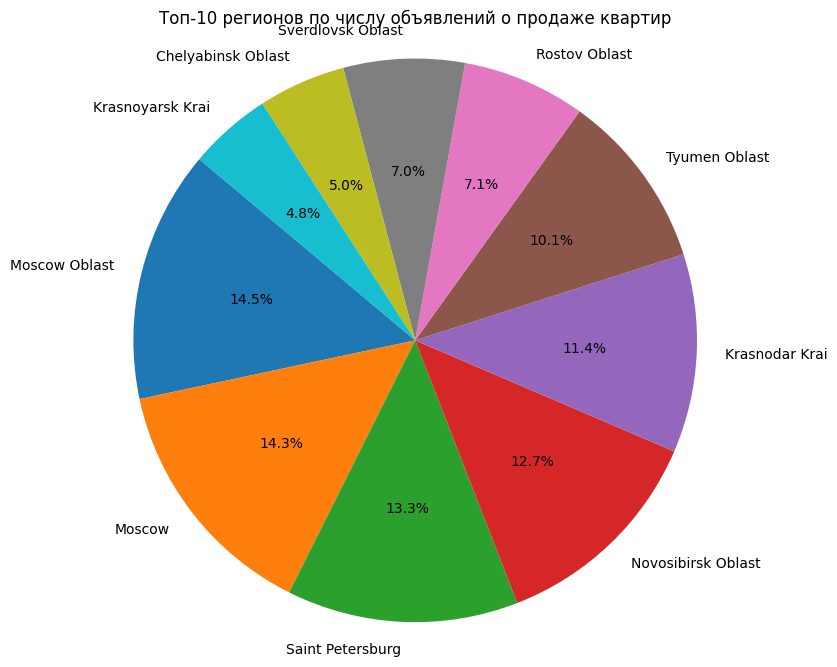

In [130]:
# Регионы в которых чаще всего публикуются объявления
top_regions = sample_data['region'].value_counts().head(10)

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-10 регионов по числу объявлений о продаже квартир')
plt.axis('equal')  # Круглая диаграмма
plt.show()

In [131]:
# import folium

# center_lat = sample_data['geo_lat'].mean()
# center_lon = sample_data['geo_lon'].mean()

# # Создаем карту
# m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# # Добавляем маркеры (можно ограничить, чтобы не перегружать карту)
# for _, row in sample_data.head(500).iterrows():  # ограничим до 500 объектов
#     folium.Marker(
#         location=[row['geo_lat'], row['geo_lon']],
#         popup=f"Цена: {int(row['price'])}₽<br>Площадь: {row['area']} м²<br>Комнат: {int(row['rooms'])}",
#         icon=folium.Icon(color='blue', icon='home')
#     ).add_to(m)

# # Показываем карту
# m

In [132]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

# Группируем данные по региону и считаем среднюю цену и площадь, а также координаты центра
region_stats = sample_data.groupby('region').agg({
    'price': 'mean',
    'area': 'mean',
    'geo_lat': 'mean',
    'geo_lon': 'mean'
}).reset_index()

# Цвета для регионов (автоматически)
import matplotlib.cm as cm
import matplotlib.colors as colors

unique_regions = region_stats['region'].unique()
cmap = cm.get_cmap('tab20', len(unique_regions))
region_color_map = {region: colors.to_hex(cmap(i)) for i, region in enumerate(unique_regions)}

# Создаём карту
m = folium.Map(location=[region_stats['geo_lat'].mean(), region_stats['geo_lon'].mean()], zoom_start=4)

# Добавляем маркеры
for _, row in region_stats.iterrows():
    folium.CircleMarker(
        location=[row['geo_lat'], row['geo_lon']],
        radius=8,
        color=region_color_map[row['region']],
        fill=True,
        fill_color=region_color_map[row['region']],
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>Регион:</b> {row['region']}<br><b>Средняя цена:</b> {int(row['price'])} ₽<br><b>Средняя площадь:</b> {round(row['area'], 1)} м²", max_width=300)
    ).add_to(m)

m

/var/folders/b7/w2lxltn5783dr_jn2g6dmngr0000gn/T/ipykernel_42003/4212407478.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(unique_regions))


### Обучение модели

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [149]:
sample_data.dropna(inplace=True)

In [150]:
X = sample_data.drop('price', axis=1)
y = sample_data.price

In [151]:
X.head()

,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,region,is_studio,mean_area_rooms,price_per_m2
0,8,17,1,42.9,9.5,55.591058,37.752858,don`t know,1,Moscow Oblast,0,42.900000,133812.004662
1,12,16,2,49.0,18.0,57.191065,65.581201,don`t know,0,Tyumen Oblast,0,24.500000,96938.775510
2,6,9,3,67.3,8.0,57.123336,65.557107,panel,0,Tyumen Oblast,0,22.433333,84621.099554
4,1,5,1,33.0,6.0,56.856968,40.550985,panel,0,Ivanovo Oblast,0,33.000000,28787.878788
5,4,5,1,38.0,16.3,59.699049,30.402232,don`t know,1,Saint Petersburg,0,38.000000,163493.289474


In [152]:
categorical_cols = ['building_type', 'region']
numeriacal_cols = X.select_dtypes(include=['float64', 'int64']).columns.difference(categorical_cols)

In [153]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [154]:
# Стандартизируем числовые признаки
scaler = StandardScaler()
X_encoded[numeriacal_cols] = scaler.fit_transform(X_encoded[numeriacal_cols])

In [155]:
y_log = np.log1p(y)

In [162]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train_log, y_test_log = train_test_split(X_encoded, y_log, test_size=0.2, random_state=42)

In [164]:
# Разделение на train и validation
X_train, X_val, y_train_log, y_val_log = train_test_split(X_train, y_train_log, test_size=0.2, random_state=42)

In [165]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [166]:
%%time
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=4,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,  # L1-регуляризация
    reg_lambda=1, # L2-регуляризация
    random_state=42,
    verbosity=1
)
model.fit(X_train, y_train_log, 
          eval_set=[(X_val, y_val_log)],
          early_stopping_rounds=20,
          verbose=True)

/Users/mzulliev/russia estate predictor/.venv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:14.02441
[1]	validation_0-rmse:13.32384
[2]	validation_0-rmse:12.65790
[3]	validation_0-rmse:12.02535
[4]	validation_0-rmse:11.42434
[5]	validation_0-rmse:10.85346
[6]	validation_0-rmse:10.31103
[7]	validation_0-rmse:9.79569
[8]	validation_0-rmse:9.30610
[9]	validation_0-rmse:8.84110
[10]	validation_0-rmse:8.39928
[11]	validation_0-rmse:7.97951
[12]	validation_0-rmse:7.58073
[13]	validation_0-rmse:7.20190
[14]	validation_0-rmse:6.84199
[15]	validation_0-rmse:6.50019
[16]	validation_0-rmse:6.17535
[17]	validation_0-rmse:5.86677
[18]	validation_0-rmse:5.57364
[19]	validation_0-rmse:5.29523
[20]	validation_0-rmse:5.03064
[21]	validation_0-rmse:4.77925
[22]	validation_0-rmse:4.54055
[23]	validation_0-rmse:4.31372
[24]	validation_0-rmse:4.09819
[25]	validation_0-rmse:3.89361
[26]	validation_0-rmse:3.69907
[27]	validation_0-rmse:3.51428
[28]	validation_0-rmse:3.33878
[29]	validation_0-rmse:3.17199
[30]	validation_0-rmse:3.01355
[31]	validation_0-rmse:2.86303
[32]	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [167]:
y_val_pred = np.expm1(model.predict(X_val))
y_test_pred = np.expm1(model.predict(X_test))
y_val_true = np.expm1(y_val_log)
y_test_true = np.expm1(y_test_log)

In [168]:
mse_val = mean_squared_error(y_val_true, y_val_pred)
mse_test = mean_squared_error(y_test_true, y_test_pred)

print(f"✅ Validation MSE: {mse_val:,.0f}")
print(f"✅ Test MSE: {mse_test:,.0f}")

✅ Validation MSE: 10,266,747,098
✅ Test MSE: 10,089,577,011


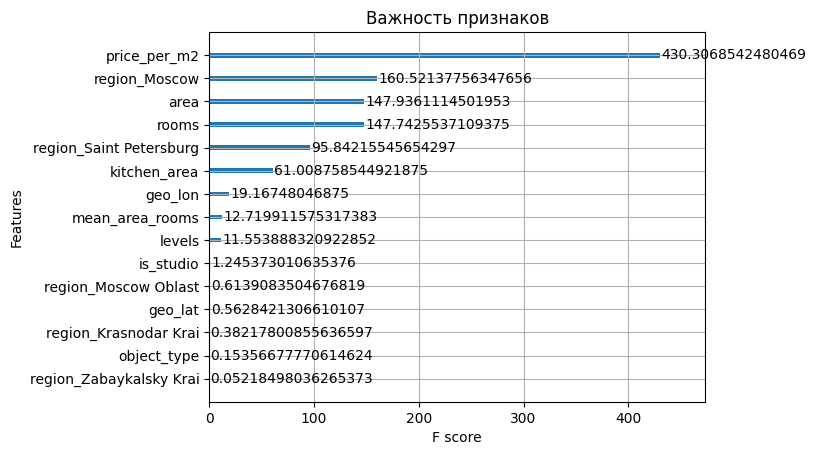

In [169]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=15, importance_type='gain')
plt.title("Важность признаков")
plt.show()

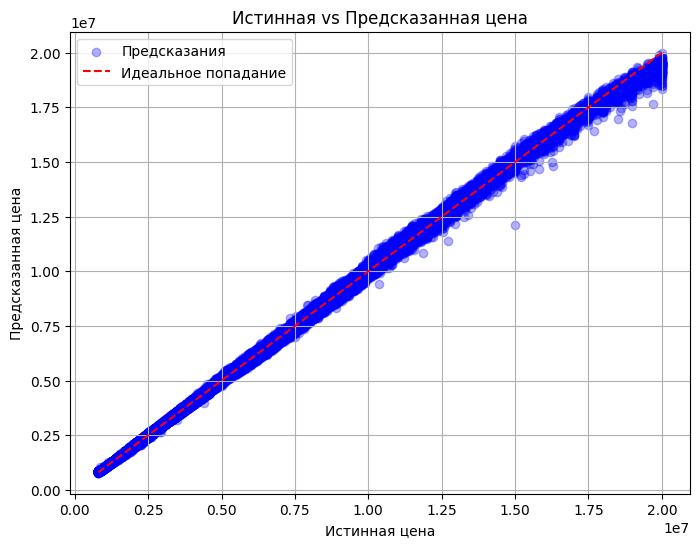

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val_true, y_val_pred, alpha=0.3, color='blue', label='Предсказания')
plt.plot([y_val_true.min(), y_val_true.max()],
         [y_val_true.min(), y_val_true.max()], 'r--', label='Идеальное попадание')
plt.xlabel("Истинная цена")
plt.ylabel("Предсказанная цена")
plt.title("Истинная vs Предсказанная цена")
plt.legend()
plt.grid(True)
plt.show()

In [225]:
import pandas as pd

test = pd.DataFrame([{
    'price': 2950000,
    'level': 12,
    'levels': 18,
    'rooms': 1,
    'area': 37,
    'kitchen_area': 10,
    'geo_lat': 55.0537145,
    'geo_lon': 82.9072329,
    'object_type': 0,
    'is_studio': 0,
    'mean_area_rooms': 37,
    'price_per_m2': 79729,
    'building_type_brick': 0,
    'building_type_don`t know': 1,
    'building_type_monolithic': 0,
    'building_type_other': 0,
    'building_type_panel': 0,
    'building_type_wooden': 0,
    'region_Altai Republic': 0,
    'region_Amur Oblast': 0,
    'region_Arkhangelsk Oblast': 0,
    'region_Astrakhan Oblast': 0,
    'region_Belgorod Oblast': 0,
    'region_Bryansk Oblast': 0,
    'region_Chechen Republic': 0,
    'region_Chelyabinsk Oblast': 0,
    'region_Chukotka Autonomous Okrug': 0,
    'region_Chuvash Republic': 0,
    'region_Irkutsk Oblast': 0,
    'region_Ivanovo Oblast': 0,
    'region_Jewish Autonomous Oblast': 0,
    'region_Kabardino-Balkarian Republic': 0,
    'region_Kaliningrad Oblast': 0,
    'region_Kaluga Oblast': 0,
    'region_Kamchatka Krai': 0,
    'region_Karachay-Cherkess Republic': 0,
    'region_Kemerovo Oblast': 0,
    'region_Khabarovsk Krai': 0,
    'region_Khanty-Mansi Autonomous Okrug – Yugra': 0,
    'region_Kirov Oblast': 0,
    'region_Komi Republic': 0,
    'region_Kostroma Oblast': 0,
    'region_Krasnodar Krai': 0,
    'region_Krasnoyarsk Krai': 0,
    'region_Kurgan Oblast': 0,
    'region_Kursk Oblast': 0,
    'region_Leningrad Oblast': 0,
    'region_Lipetsk Oblast': 0,
    'region_Magadan Oblast': 0,
    'region_Mari El Republic': 0,
    'region_Moscow': 0,
    'region_Moscow Oblast': 0,
    'region_Murmansk Oblast': 0,
    'region_Nenets Autonomous Okrug': 0,
    'region_Nizhny Novgorod Oblast': 0,
    'region_Novgorod Oblast': 0,
    'region_Novosibirsk Oblast': 1,
    'region_Omsk Oblast': 0,
    'region_Orenburg Oblast': 0,
    'region_Oryol Oblast': 0,
    'region_Penza Oblast': 0,
    'region_Perm Krai': 0,
    'region_Primorsky Krai': 0,
    'region_Pskov Oblast': 0,
    'region_Republic of Adygea': 0,
    'region_Republic of Bashkortostan': 0,
    'region_Republic of Buryatia': 0,
    'region_Republic of Crimea (disputed)': 0,
    'region_Republic of Dagestan': 0,
    'region_Republic of Ingushetia': 0,
    'region_Republic of Kalmykia': 0,
    'region_Republic of Karelia': 0,
    'region_Republic of Khakassia': 0,
    'region_Republic of Mordovia': 0,
    'region_Republic of North Ossetia-Alania': 0,
    'region_Republic of Sakha (Yakutia)': 0,
    'region_Republic of Tatarstan': 0,
    'region_Rostov Oblast': 0,
    'region_Ryazan Oblast': 0,
    'region_Saint Petersburg': 0,
    'region_Sakhalin Oblast': 0,
    'region_Samara Oblast': 0,
    'region_Saratov Oblast': 0,
    'region_Sevastopol (disputed)': 0,
    'region_Smolensk Oblast': 0,
    'region_Stavropol Krai': 0,
    'region_Sverdlovsk Oblast': 0,
    'region_Tambov Oblast': 0,
    'region_Tomsk Oblast': 0,
    'region_Tula Oblast': 0,
    'region_Tuva Republic': 0,
    'region_Tver Oblast': 0,
    'region_Tyumen Oblast': 0,
    'region_Udmurt Republic': 0,
    'region_Ulyanovsk Oblast': 0,
    'region_Vladimir Oblast': 0,
    'region_Volgograd Oblast': 0,
    'region_Vologda Oblast': 0,
    'region_Voronezh Oblast': 0,
    'region_Yamalo-Nenets Autonomous Okrug': 0,
    'region_Yaroslavl Oblast': 0,
    'region_Zabaykalsky Krai': 0
}])

In [226]:
test

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,object_type,is_studio,...,region_Tyumen Oblast,region_Udmurt Republic,region_Ulyanovsk Oblast,region_Vladimir Oblast,region_Volgograd Oblast,region_Vologda Oblast,region_Voronezh Oblast,region_Yamalo-Nenets Autonomous Okrug,region_Yaroslavl Oblast,region_Zabaykalsky Krai
0,2950000,12,18,1,37,10,55.053714,82.907233,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
test_X = test.drop('price', axis=1)
test_y = test.price

In [218]:
test_X[numeriacal_cols] = scaler.transform(test_X[numeriacal_cols])

In [219]:
test_X

,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,object_type,is_studio,mean_area_rooms,...,region_Tyumen Oblast,region_Udmurt Republic,region_Ulyanovsk Oblast,region_Vladimir Oblast,region_Volgograd Oblast,region_Vologda Oblast,region_Voronezh Oblast,region_Yamalo-Nenets Autonomous Okrug,region_Yaroslavl Oblast,region_Zabaykalsky Krai
0,1.147882,0.978474,-0.939458,-0.781685,-0.093034,0.140718,1.544521,-0.511036,-0.177976,0.806992,...,0,0,0,0,0,0,0,0,0,0


In [233]:
test_y_pred = np.expm1(model.predict(test_X))
print(f'предсказано: {test_y_pred[0]}\nистина: {test_y[0]}')
print(f'разница: {abs(test_y_pred[0] - test_y[0])}')

предсказано: 2875253.25
истина: 2950000
разница: 74746.75
